In [3]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/SpotifyDataScienceProject/main/Data/input.csv")

In [89]:
testing1=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/SpotifyDataScienceProject/main/Data/complete_data.csv")

In [90]:
print(testing1)

                                         track_name           artist  \
0                                   Blinding Lights       The Weeknd   
1                                      Shape of You       Ed Sheeran   
2                                 Someone You Loved    Lewis Capaldi   
3     Sunflower - Spider-Man: Into the Spider-Verse      Post Malone   
4                                           Starboy       The Weeknd   
...                                             ...              ...   
2452                                            512             Mora   
2453                                          Diosa      Myke Towers   
2454                                         A-Punk  Vampire Weekend   
2455                                            TQM    Fuerza Regida   
2456                                 NI BIEN NI MAL        Bad Bunny   

                                        album release_date  duration  \
0                                 After Hours   2020-03-20    2

In [4]:
# DATA PREPPROCESSING (Basic Info)

# print(df.shape) # size of 1000 (entries), 27 (features)

print(df.info())
# df

# int (6): 
# Popularity,  Duration, key, mode, duration_ms, time_signature 

# float64(9): mostly audio features
# danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo

# object(11):
# Artist, Track, Track ID, Release Date, Album Name, Lyrics, type, id, uri, track_href, analysis_url

# bool (1)
# Explicit

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            1000 non-null   object 
 1   Track             1000 non-null   object 
 2   Track ID          1000 non-null   object 
 3   Popularity        1000 non-null   int64  
 4   Duration          1000 non-null   int64  
 5   Release Date      1000 non-null   object 
 6   Album Name        1000 non-null   object 
 7   Explicit          1000 non-null   bool   
 8   Lyrics            974 non-null    object 
 9   danceability      1000 non-null   float64
 10  energy            1000 non-null   float64
 11  key               1000 non-null   int64  
 12  loudness          1000 non-null   float64
 13  mode              1000 non-null   int64  
 14  speechiness       1000 non-null   float64
 15  acousticness      1000 non-null   float64
 16  instrumentalness  1000 non-null   float64
 

In [5]:
# check null and duplicate values

# identify null data
print("Number of null values in the dataset:\n{0}".format(df.isnull().sum())) 
# There are 26 missing value in lyrics--> will be handled

# identify duplciate data
print("\nNumber of duplicate data in the dataset:\n{0}".format(df.duplicated().sum())) # No duplicate values

Number of null values in the dataset:
Artist               0
Track                0
Track ID             0
Popularity           0
Duration             0
Release Date         0
Album Name           0
Explicit             0
Lyrics              26
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
type                 0
id                   0
uri                  0
track_href           0
analysis_url         0
duration_ms          0
time_signature       0
dtype: int64

Number of duplicate data in the dataset:
0


In [6]:
# 2. drop duration_ms (Duration already exist)


df.drop(columns=['duration_ms'], inplace=True)
# df.columns

In [7]:
# drop object columns: track_href, analysis_url, Track ID, id, uri, and type
df.drop(columns=['track_href', 'analysis_url', 'Track ID', 'id', 'uri', 'type'], inplace=True)

print(df.shape)

(1000, 20)


In [8]:
df.shape

(1000, 20)

In [91]:
df.columns

Index(['Artist', 'Track', 'Popularity', 'Duration', 'Release Date',
       'Album Name', 'Explicit', 'Lyrics', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [9]:
# DATA PREPPROCESSING (Part 1: numbers)

# 1. binary encode boolean feature (explicit) 
# print(df['Explicit'].value_counts())
df['Explicit']=df['Explicit'].astype(int)
# print(df['Explicit'].value_counts()) # 636 False, 364 True

# 2. drop duration_ms (Duration already exist)
# df.drop(columns=['duration_ms'], inplace=True)
# df.columns

In [10]:
# Descriptive/ Summary statistics for continuous data (15 columns)
numeric_summary=df.describe().style.set_caption('Summary Statistics for Continuous Data').format(precision=2).background_gradient(cmap='Blues')
display(numeric_summary)

,Popularity,Duration,Explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,78.26,216184.53,0.36,0.66,0.67,5.22,-6.00,0.54,0.10,0.20,0.01,0.18,0.49,121.25,3.98
std,7.27,54485.61,0.48,0.14,0.16,3.60,2.14,0.50,0.09,0.23,0.07,0.13,0.22,27.39,0.19
min,46.00,60719.00,0.00,0.21,0.09,0.00,-17.66,0.00,0.02,0.00,0.00,0.02,0.03,56.83,3.00
25%,74.00,184845.25,0.00,0.57,0.57,2.00,-7.09,0.00,0.04,0.03,0.00,0.09,0.32,99.99,4.00
50%,79.00,210820.00,0.00,0.67,0.68,5.00,-5.69,1.00,0.06,0.11,0.00,0.12,0.47,120.00,4.00
75%,84.00,238172.00,1.00,0.77,0.78,8.00,-4.58,1.00,0.12,0.29,0.00,0.21,0.65,138.95,4.00
max,97.00,592920.00,1.00,0.97,0.99,11.00,-1.48,1.00,0.55,0.98,0.85,0.89,0.97,203.76,5.00


In [11]:
# DATA PREPPROCESSING (Part 2: TEXT)

# check the object columns
# Select columns of type 'object'
object_columns = df.select_dtypes(include=['object']) # 5 columns left
# Artist, Track, Release Date, Album Name, Lyrics


# Convert object column to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])
# print(df['Release Date']) # success

In [12]:
# DATA has 1000,20: 20=15(int/float)+4(object/string)+1(datetime)

import lyricsgenius
genius=lyricsgenius.Genius("jCaG2w1CCDLgiXm8JGamJxOdA1Z8eMEKYJhjecctVLM270hsAJkwDBReNzhbZ4Fg", retries=3)

# try to 26 lyrics
# find the songs with missing values
missing_index = df[df.isnull().any(axis=1)].index

# print("Indexes of rows with missing values:")
missing_index_list=list(missing_index)
# print(missing_index_list) # [75, 80, 147, 168, 214, 254, 395, 399, 448, 506, 516, 539, 615, 645, 648, 649, 664, 714, 761, 778, 805, 808, 811, 815, 817, 829]

# 
temp=0

# impute it manually with the website
for i in missing_index_list:
    try:
        # Attempt to search for the song
        song = genius.search_song(df.loc[i, 'Track'].split("(", 1)[0], df.loc[i, 'Artist'])
        if song:
            # IMPUTE IT 
            df.loc[i, 'Lyrics']=song.lyrics
            # temp+=1
        else:
            song2 = genius.search_song(df.loc[i, 'Track'].split()[0], df.loc[i, 'Artist'])
            if song2:
                # IMPUTE IT 
                df.loc[i, 'Lyrics']=song2.lyrics
                # temp+=1

    except Exception as e:
        print("Error occurred:", e)

Searching for "Godzilla " by Eminem...
Done.
Searching for "Sunflower - Spider-Man: Into the Spider-Verse" by Post Malone...
Done.
Searching for "Cinderella" by Travis Scott...
Specified song does not contain lyrics. Rejecting.
Searching for "Cinderella" by Travis Scott...
Specified song does not contain lyrics. Rejecting.
Searching for "Bandit " by Juice WRLD...
Done.
Searching for "Memories " by David Guetta...
Done.
Searching for "LOVE. FEAT. ZACARI." by Kendrick Lamar...
Done.
Searching for "Power Trip " by J. Cole...
Done.
Searching for "She Knows " by J. Cole...
Done.
Searching for "Waka Waka " by Shakira...
Done.
Searching for "I Like You " by Doja Cat...
Done.
Searching for "The Way Life Goes " by Lil Uzi Vert...
Done.
Searching for "Kiss Me More " by SZA...
Done.
Searching for "Can’t Catch Me Now - from The Hunger Games: The Ballad of Songbirds & Snakes" by Olivia Rodrigo...
No results found for: 'Can’t Catch Me Now - from The Hunger Games: The Ballad of Songbirds & Snakes Oli

In [13]:
# # get the lyrics for one song

# sub_str=genius.search_song("Sunflower", "Post Malone & Swae Lee").lyrics

# sub_str.split('\n', 1)[1]

df['Lyrics']

0      203 ContributorsTranslationsTürkçeEspañolСрпск...
1      176 ContributorsTranslationsРусскийالعربيةУкра...
2      200 ContributorsTranslationsPortuguêsEspañolTü...
3      287 ContributorsTranslationsNederlandsTürkçeEs...
4      160 ContributorsTranslationsPortuguêsEspañolFr...
                             ...                        
995    65 ContributorsTranslationsDeutschБългарскиEsp...
996    256 ContributorsTranslationsEspañolРусскийفارس...
997    157 ContributorsTranslationsEspañolРусскийPort...
998    183 ContributorsTranslationsTürkçeEspañolDeuts...
999    131 ContributorsTranslationsEspañolРусскийPort...
Name: Lyrics, Length: 1000, dtype: object

In [14]:
# find the ones that are really missing:

missing_index = df[df.isnull().any(axis=1)].index

# print("Indexes of rows with missing values:")
missing_index_list=list(missing_index) 
print(missing_index_list)

# manual imputation by changing artist name
# impute it manually with the website
for i in missing_index_list:
    temp_artist_list=["Post Malone & Swae Lee", 'Future, Metro Boomin & Travis Scott']
    for j in temp_artist_list:
        try:
            # Attempt to search for the song
            song = genius.search_song(df.loc[i, 'Track'].split()[0], j)
            if song:
                # IMPUTE IT 
                df.loc[i, 'Lyrics']=song.lyrics
                temp+=1

        except Exception as e:
            print("Error occurred:", e)

# print(df[df.isnull().any(axis=1)].index)

[147]
Searching for "Cinderella" by Post Malone & Swae Lee...
Done.
Searching for "Cinderella" by Future, Metro Boomin & Travis Scott...
Done.


In [15]:
print("Number of null values in the dataset:\n{0}".format(df.isnull().sum())) 

Number of null values in the dataset:
Artist              0
Track               0
Popularity          0
Duration            0
Release Date        0
Album Name          0
Explicit            0
Lyrics              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64


# EDA Part

## todo-list:
* provide descriptive statistics (DONE)

* univariate: (DONE)

* outlier detection through boxplots for continuous data
* frequency analysis through barplot for discrete data
* outlier and unknown removal--> (DONE)

* multivariate: pairwise scaterplot(predictor vs y) to see trends, correlation analysis to check multicolinarity (heatmaps)

* Standarizations and multicolinearity?

* write conclusions

In [16]:
# Descriptive/ Summary statistics for continuous data (15 columns)
numeric_summary=df.describe().style.set_caption('Summary Statistics for Continuous Data').format(precision=2).background_gradient(cmap='Blues')
display(numeric_summary)

,Popularity,Duration,Explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,78.26,216184.53,0.36,0.66,0.67,5.22,-6.00,0.54,0.10,0.20,0.01,0.18,0.49,121.25,3.98
std,7.27,54485.61,0.48,0.14,0.16,3.60,2.14,0.50,0.09,0.23,0.07,0.13,0.22,27.39,0.19
min,46.00,60719.00,0.00,0.21,0.09,0.00,-17.66,0.00,0.02,0.00,0.00,0.02,0.03,56.83,3.00
25%,74.00,184845.25,0.00,0.57,0.57,2.00,-7.09,0.00,0.04,0.03,0.00,0.09,0.32,99.99,4.00
50%,79.00,210820.00,0.00,0.67,0.68,5.00,-5.69,1.00,0.06,0.11,0.00,0.12,0.47,120.00,4.00
75%,84.00,238172.00,1.00,0.77,0.78,8.00,-4.58,1.00,0.12,0.29,0.00,0.21,0.65,138.95,4.00
max,97.00,592920.00,1.00,0.97,0.99,11.00,-1.48,1.00,0.55,0.98,0.85,0.89,0.97,203.76,5.00


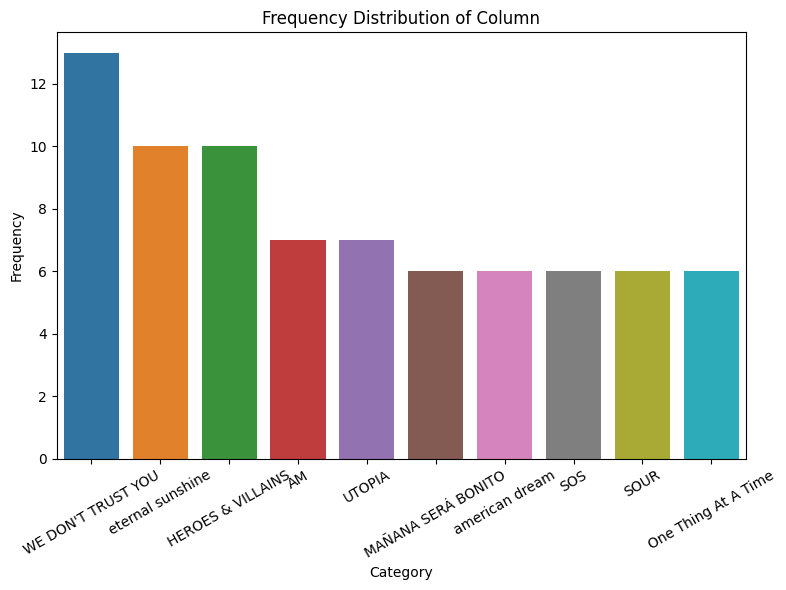

In [65]:
# Frequency analysis

# frequency analysis for categorical variable and encoded numerical variables:
import matplotlib.pyplot as plt

# artist is uniformly distributed
# track is an issue now
# album is interesing though


test=df['Album Name'].value_counts().head(10)

test_df=test.reset_index()
test_df.columns=['Category', 'Frequency']

# Plot the frequency distribution using a boxplot
plt.figure(figsize=(8, 6))
sns.barplot(y='Frequency', x='Category' ,data=test_df)
plt.xlabel('Category')
plt.title('Frequency Distribution of Column')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()



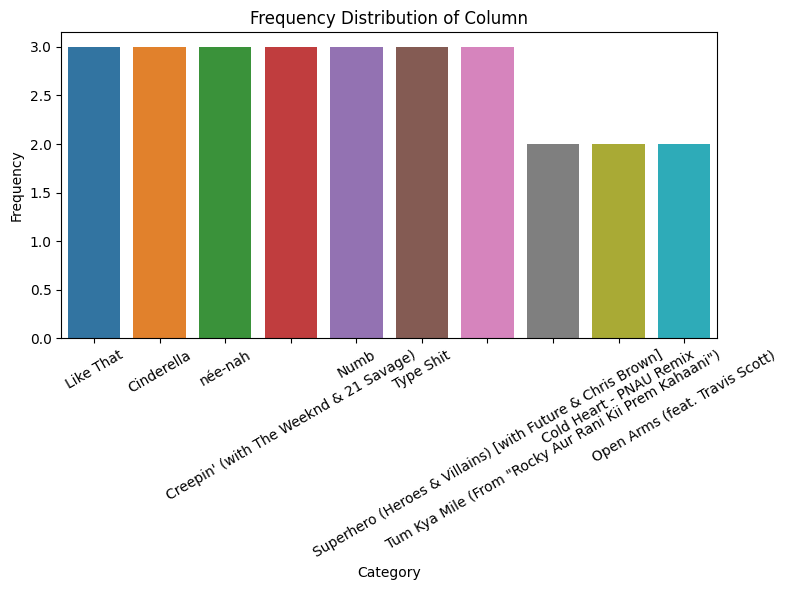

In [70]:
test=df['Track'].value_counts().head(10)

test_df=test.reset_index()
test_df.columns=['Category', 'Frequency']

# Plot the frequency distribution using a boxplot
plt.figure(figsize=(8, 6))
sns.barplot(y='Frequency', x='Category' ,data=test_df)
plt.xlabel('Category')
plt.title('Frequency Distribution of Column')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

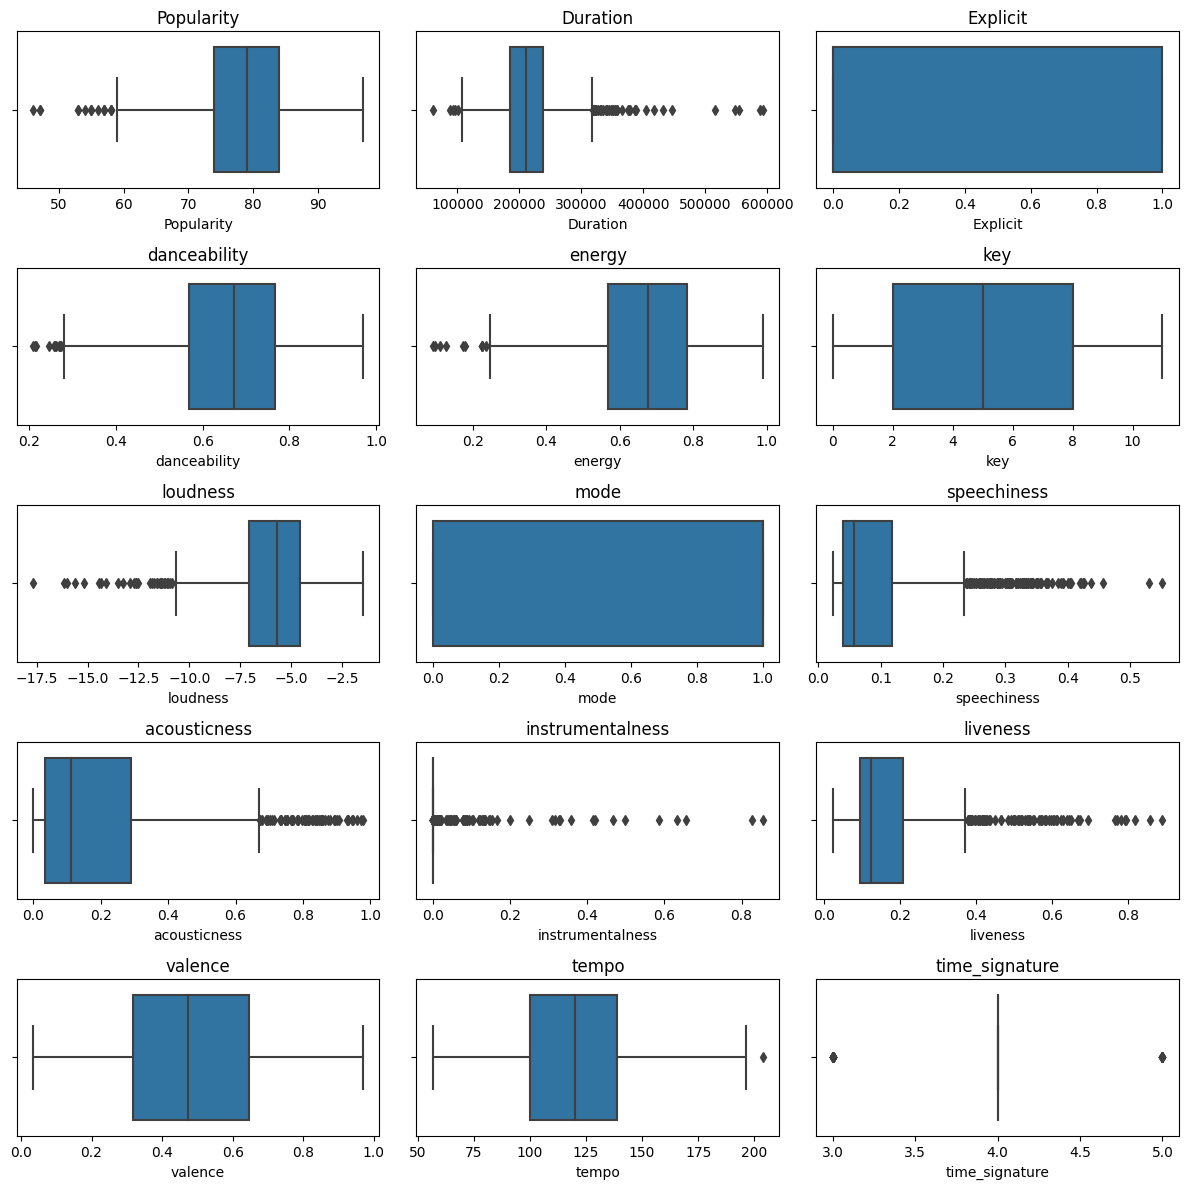

In [18]:
# univariate EDA
# numerical analysis
import matplotlib.pyplot as plt
import seaborn as sns

num_rows = 5
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# print(df.select_dtypes(include=['number']).columns)

# exclude poutcome and y
# Plot each numeric column's box plot
for i, column in enumerate(df.select_dtypes(include=['number']).columns):
    row = i // num_cols
    col = i % num_cols
    if row < num_rows and col < num_cols:
        sns.boxplot(x=df[column], ax=axes[row, col])
        axes[row, col].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

# NOT REMOVING OTHERS CUZ THEY UNIQUE
# removing low popularity? PROB 2

In [77]:
# outlier detection

# take the 3 lowest popularity out
# find the ones with <50 popularity 
df[df['Popularity']<50]

# print(df.shape) # (1000, 20)

adjusted_df=df.loc[~((df['Popularity']<50))]

# print(adjusted_df.shape) # (997, 20)

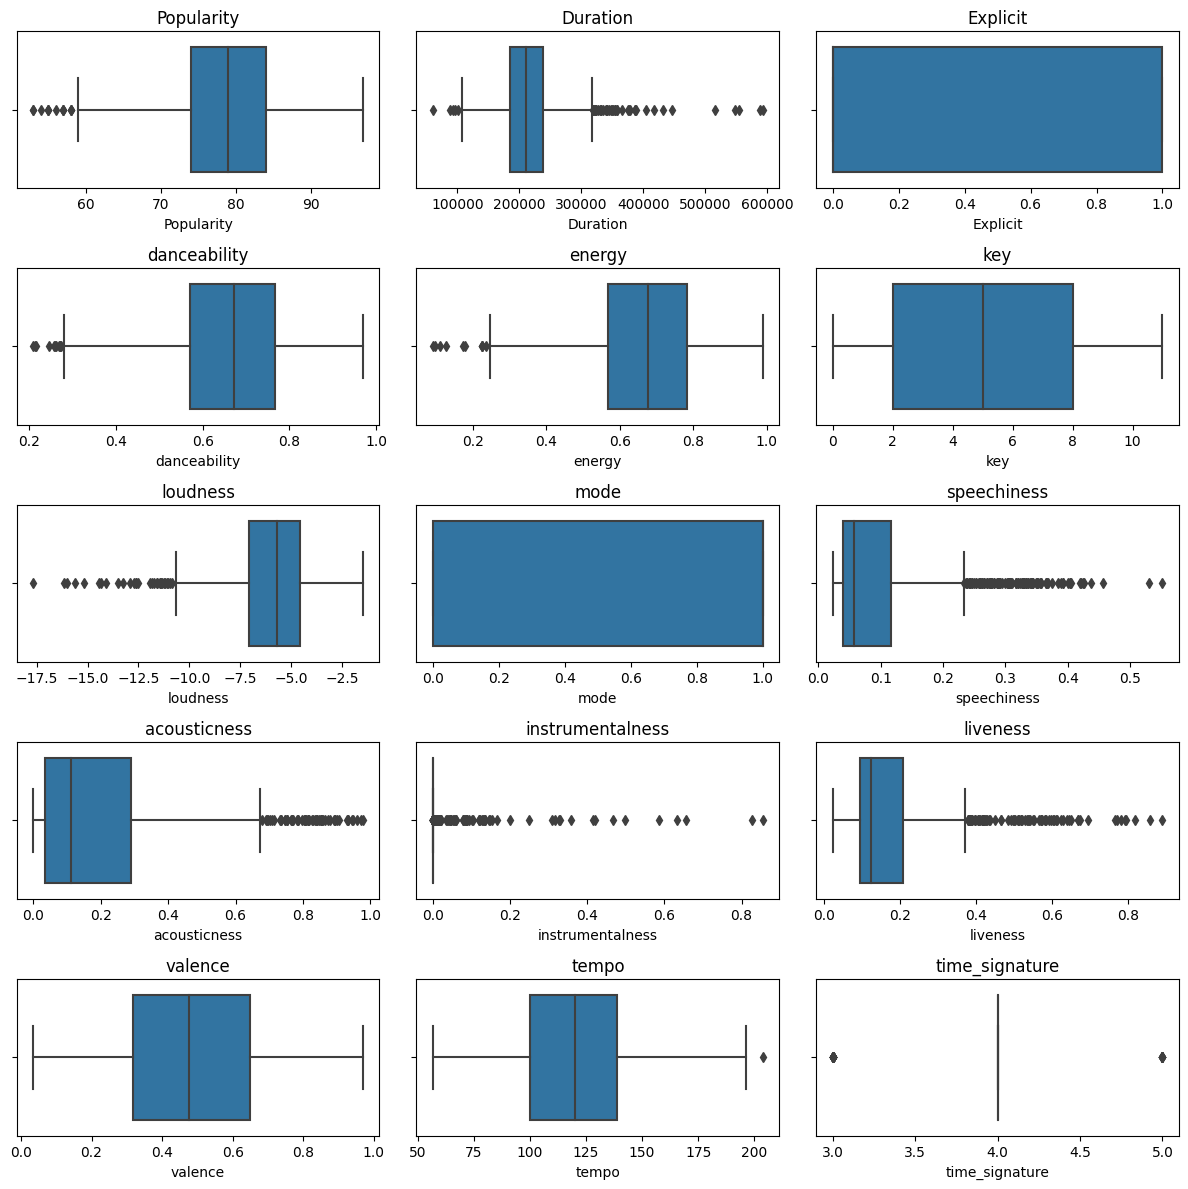

In [29]:
# univariate EDA
# numerical analysis
import matplotlib.pyplot as plt
import seaborn as sns

num_rows = 5
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# print(df.select_dtypes(include=['number']).columns)

# exclude poutcome and y
# Plot each numeric column's box plot
for i, column in enumerate(adjusted_df.select_dtypes(include=['number']).columns):
    row = i // num_cols
    col = i % num_cols
    if row < num_rows and col < num_cols:
        sns.boxplot(x=adjusted_df[column], ax=axes[row, col])
        axes[row, col].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

# NOT REMOVING OTHERS CUZ THEY UNIQUE
# removing low popularity? PROB 2

In [21]:
# Data normalization/ scaling

# ruin the originality--> no act

KeyboardInterrupt: 

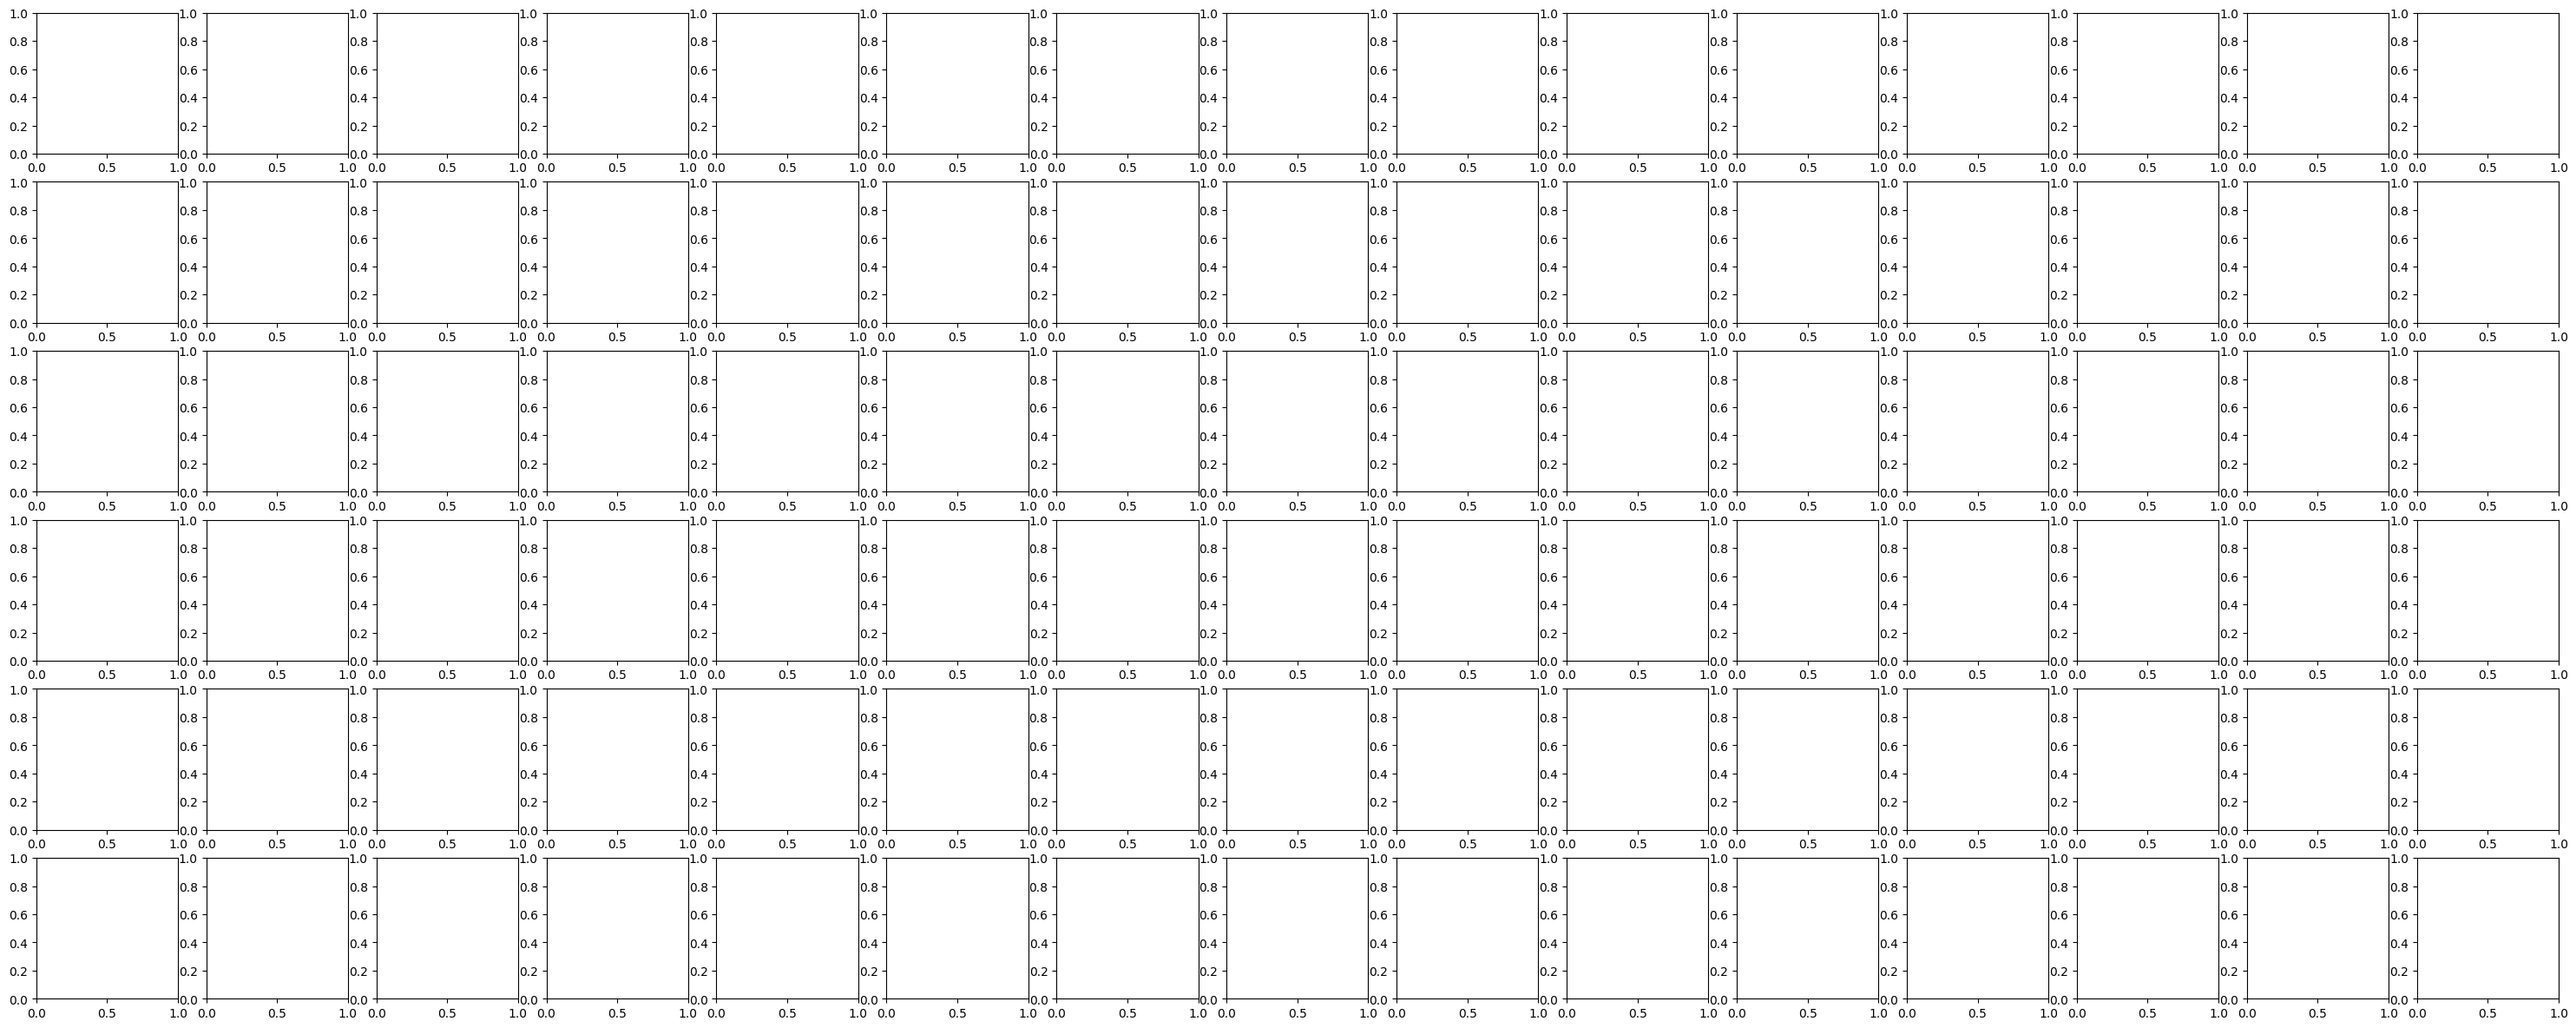

In [30]:
# multivariate EDA (takes 3 min)

# Multivariate analysis- print pairwise scatterplot for each x to y
# Warning: takes a long time to run

# import seaborn as sns
# sns.pairplot(adjusted_df)


In [83]:
import re
import string
from langdetect import detect
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from contractions import fix

# Download NLTK resources if not already installed
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

testing_df = adjusted_df.copy()

# Define a function to check if the text is in English
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False  # Return False if language detection fails

def clean_lyrics(lyrics):
    # Split the lyrics string by newline character ('\n') and limit to 2 splits
    split_lyrics = lyrics.split('\n', 1)
    if len(split_lyrics) > 1:
        # If there are at least two elements after split, get the second element and omit the last 8 characters
        cleaned_lyrics = split_lyrics[1][:-8]
        # Remove square brackets and the content inside them
        cleaned_lyrics = re.sub(r'\[.*?\]', '', cleaned_lyrics)
        # Remove round brackets but keep their content intact, replace "\n" with " ", and lowercase every word
        cleaned_lyrics = re.sub(r'\(|\)', '', cleaned_lyrics).replace("\n", " ").lower()
        
        # Tokenization
        tokens = word_tokenize(cleaned_lyrics)
        
        # Stopword Removal
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        
        # Removing Special Characters and Punctuation
        tokens = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in tokens if word]
        
        # Contraction Handling
        tokens = [fix(word) for word in tokens]
        
        # Lemmatization
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        
        # Join tokens back into a string
        cleaned_lyrics = ' '.join(tokens)

        # strip the spaces
        cleaned_lyrics=cleaned_lyrics.strip()

        # Check if the cleaned lyrics are in English
        return cleaned_lyrics if is_english(cleaned_lyrics) else None
    else:
        return None  # Return None if split_lyrics has fewer than 2 elements

# Apply the function to each item in the DataFrame column
testing_df['Lyrics'] = testing_df['Lyrics'].apply(lambda x: clean_lyrics(x))

testing_df['Lyrics']


[nltk_data] Downloading package punkt to /Users/alexmak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexmak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/alexmak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0      yeah  yeah  yeah  yeah fever dream high quiet ...
1      could leave christmas light til january place ...
2      thing get older  never wiser midnight become a...
3      vintage tee  brand new phone high heel cobbles...
4      flight flown uhhuh wilt rose uhhuh slept alone...
                             ...                        
995    hey  look  look  look  look going way  man goi...
996    yeah  m gon na take horse old town road m gon ...
997    dddaytrip took ten hey ayy  panini  nt meanie ...
998    tttay keith  took ten hey ayy  s holiday got h...
999    daytrip took 10 hey oh  go  please let know go...
Name: Lyrics, Length: 997, dtype: object

In [85]:
adjusted_df=testing_df

In [31]:
# import re
# import string
# from langdetect import detect

# # # Define a function to check if the text is in English
# def is_english(text):
#     try:
#         return detect(text) == 'en'
#     except:
#         return False  # Return False if language detection fails


# def clean_lyrics(lyrics):
#     # Split the lyrics string by newline character ('\n') and limit to 2 splits
#     split_lyrics = lyrics.split('\n', 1)
#     if len(split_lyrics) > 1:
#         # If there are at least two elements after split, get the second element and omit the last 8 characters
#         cleaned_lyrics = split_lyrics[1][:-8]
#         # Remove square brackets and the content inside them
#         cleaned_lyrics = re.sub(r'\[.*?\]', '', cleaned_lyrics)
#         # Remove round brackets but keep their content intact, replace "\n" with " ", and lowercase every word
#         cleaned_lyrics = re.sub(r'\(|\)', '', cleaned_lyrics).replace("\n", " ").lower()
#         # Remove punctuation
#         cleaned_lyrics = cleaned_lyrics.translate(str.maketrans('', '', string.punctuation))
#         # Check if the cleaned lyrics are in English
#         return cleaned_lyrics if is_english(cleaned_lyrics) else None
#     else:
#         return None  # Return None if split_lyrics has fewer than 2 elements

# # Apply the function to each item in the DataFrame column
# adjusted_df['Lyrics'] = adjusted_df['Lyrics'].apply(lambda x: clean_lyrics(x))

# adjusted_df['Lyrics'] 

/var/folders/vz/8f0dlrxd14g849p0gddrr1c00000gn/T/ipykernel_869/2490841148.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adjusted_df['Lyrics'] = adjusted_df['Lyrics'].apply(lambda x: clean_lyrics(x))


0      yeah yeah yeah yeah   fever dream high in the ...
1      we could leave the christmas lights up til jan...
2      i have this thing where i get older but just n...
3      vintage tee brand new phone high heels on cobb...
4      is it is it is it is it is it   once the fligh...
                             ...                        
995    hey look look look but look we going all the w...
996    yeah im gonna take my horse to the old town ro...
997    dddaytrip took it to ten hey   ayy panini dont...
998    tttay keith took it to ten hey   ayy its a hol...
999    daytrip took it to 10 hey   oh here we go plea...
Name: Lyrics, Length: 997, dtype: object

In [86]:
num_none = adjusted_df['Lyrics'].value_counts(dropna=False).get(None, 0)
print("Number of 'None' values in the column:", num_none)

# drop them for sentiment analysis part

Number of 'None' values in the column: 193


In [34]:
# # stopwords

# import nltk

# from nltk.corpus import stopwords

# nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/alexmak/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [35]:
# stop_words=stopwords.words('english')
# # Apply lambda function to clean the lyrics column
# adjusted_df['Lyrics'] = adjusted_df['Lyrics'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words) if word is not None else None)

# # adjusted_df['Lyrics'] = adjusted_df['Lyrics'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words))
# adjusted_df.head(10)

# adjusted_df['Lyrics']

/var/folders/vz/8f0dlrxd14g849p0gddrr1c00000gn/T/ipykernel_869/381055940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adjusted_df['Lyrics'] = adjusted_df['Lyrics'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words) if word is not None else None)


0      yeah yeah yeah yeah fever dream high quiet nig...
1      could leave christmas lights til january place...
2      thing get older never wiser midnights become a...
3      vintage tee brand new phone high heels cobbles...
4      flight flown uhhuh wilt rose uhhuh slept alone...
                             ...                        
995    hey look look look look going way man going pa...
996    yeah im gonna take horse old town road im gonn...
997    dddaytrip took ten hey ayy panini dont meanie ...
998    tttay keith took ten hey ayy holiday got hoes ...
999    daytrip took 10 hey oh go please let know go d...
Name: Lyrics, Length: 997, dtype: object

In [36]:
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

# # adjusted_df['Lyrics'] = adjusted_df['Lyrics'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words) if word is not None else None)

# adjusted_df['Lyrics'] = adjusted_df['Lyrics'].apply(lambda lyrics: " ".join(lemmatizer.lemmatize(word) for word in lyrics.split()) if lyrics is not None else None)
# # adjusted_df['Lyrics'] = adjusted_df['Lyrics'].apply(lambda word: " ".join(lemmat.lemmatize(word) for word in word.split()))
# adjusted_df['Lyrics']

/var/folders/vz/8f0dlrxd14g849p0gddrr1c00000gn/T/ipykernel_869/541783995.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adjusted_df['Lyrics'] = adjusted_df['Lyrics'].apply(lambda lyrics: " ".join(lemmatizer.lemmatize(word) for word in lyrics.split()) if lyrics is not None else None)


0      yeah yeah yeah yeah fever dream high quiet nig...
1      could leave christmas light til january place ...
2      thing get older never wiser midnight become af...
3      vintage tee brand new phone high heel cobblest...
4      flight flown uhhuh wilt rose uhhuh slept alone...
                             ...                        
995    hey look look look look going way man going pa...
996    yeah im gonna take horse old town road im gonn...
997    dddaytrip took ten hey ayy panini dont meanie ...
998    tttay keith took ten hey ayy holiday got hoe h...
999    daytrip took 10 hey oh go please let know go d...
Name: Lyrics, Length: 997, dtype: object

In [88]:
# Drop rows where Lyrics is None
sample_df=adjusted_df.copy()

sample_df.dropna(subset=['Lyrics'], inplace=True)

# Now check the number of duplicate data
print("\nNumber of duplicate data in the dataset:\n{0}".format(sample_df['Lyrics'].duplicated().sum()))

# print("\nNumber of duplicate data in the dataset:\n{0}".format(adjusted_df['Lyrics'].duplicated().sum())) # No duplicate values


Number of duplicate data in the dataset:
58


# Text Preprocessing
* Lowercase (DONE)
* Remove punctuations (DONE)
* Tokenize (DONE)
* Stopword Removal (DONE)
* Lemmatize (DONE)

In [42]:
categorical_columns = adjusted_df.select_dtypes(include=['object']).columns

# categorical_columns = list(df.select_dtypes(include=['object']).drop(['Lyrics']).columns) # 

categorical_columns=categorical_columns
print(categorical_columns)

Index(['Artist', 'Track', 'Album Name', 'Lyrics'], dtype='object')


# feature eng
* numeric
    * transform duration to seconds by * 1000
    * transform loudness to positive?

* text
    * label encdoing
    * Text encoding
        * count vectorization
        * TF-IDF character level

In [ ]:
# label encoing
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
# count 
cv = CountVectorizer()
cv.fit(X_train)
X_train_count = cv.transform(X_train)
X_test_count = cv.transform(X_test)

In [ ]:
# TF-IDF
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)